# Problem 1: Spam and Ham data

In [1]:
import tarfile
import email
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/MahdiTheGreat/Spam-Ham.git
%cd Spam-Ham

Cloning into 'Spam-Ham'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 27 (delta 12), reused 16 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 8.45 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Spam-Ham


In [3]:
random_state = 42
test_size=0.2

In [18]:
def read_data(fn):
    dataset = list()
    with tarfile.open(fn) as tf:
        for i in tf:
            if i.isfile():
                with tf.extractfile(i) as f:
                    b = f.read()
                    # Parse the email to get the charset
                    try:
                        # we use the email module to parse and read email files
                        msg = email.message_from_bytes(b)
                        charset = msg.get_content_charset()
                        if not charset:
                            charset = 'UTF-8'  # Default if charset not specified
                        s = b.decode(charset, errors='replace')
                    except:
                        s = b.decode('UTF-8', errors='replace')
                    dataset.append(s)
    return dataset

data = {
    'easy_ham': read_data('20021010_easy_ham.tar.bz2'),
    'hard_ham': read_data('20021010_hard_ham.tar.bz2'),
    'spam': read_data('20021010_spam.tar.bz2')
}

In [19]:
def create_dataframe(email_list, label):
    df = pd.DataFrame(email_list, columns=['email'])
    df['label'] = label
    return df

# Create DataFrames for each category with specific labels
df_easy_ham = create_dataframe(data['easy_ham'], 'easy_ham')
df_hard_ham = create_dataframe(data['hard_ham'], 'hard_ham')
df_spam = create_dataframe(data['spam'], 'spam')

In [21]:
from IPython.display import display
display(df_easy_ham)
display(df_hard_ham)
display(df_spam)

,email,label
0,From fork-admin@xent.com Wed Aug 28 10:50:29 ...,easy_ham
1,From exmh-users-admin@redhat.com Mon Sep 2 1...,easy_ham
2,From exmh-users-admin@redhat.com Fri Sep 13 1...,easy_ham
3,From rpm-list-admin@freshrpms.net Thu Aug 29 ...,easy_ham
4,From rpm-list-admin@freshrpms.net Mon Sep 9 ...,easy_ham
...,...,...
2546,From fork-admin@xent.com Thu Aug 29 16:52:57 ...,easy_ham
2547,From fork-admin@xent.com Thu Aug 29 16:32:25 ...,easy_ham
2548,From fork-admin@xent.com Mon Sep 2 13:14:58 ...,easy_ham
2549,From fork-admin@xent.com Mon Sep 2 16:22:23 ...,easy_ham


,email,label
0,Return-Path: <2.20576.84-RV8hl0UTyzYK.1.b@umma...,hard_ham
1,Return-Path: <Online#3.20304.83-p1SYlJ1blFvQjR...,hard_ham
2,Return-Path: <Online#3.20777.51-8J4zgE1Uu7_vxs...,hard_ham
3,From bounce-customers-949326@mail.ryanairmail....,hard_ham
4,From zzz@example.com Wed Sep 4 18:34:43 2002...,hard_ham
...,...,...
245,Return-Path: <Online#3.20341.24-QI_LgZARqA78Cd...,hard_ham
246,Return-Path: <bounce-lgmedia-2534370@sprocket....,hard_ham
247,Return-Path: <Online#3.20467.ac-q5A1l6tzmmPhUd...,hard_ham
248,Return-Path: <2.20880.71-S6_ngjncfBFy.1.b@umma...,hard_ham


,email,label
0,From george@vccomputers.ie Mon Aug 26 17:49:4...,spam
1,From gwfqjulie@msn.com Mon Aug 26 21:37:20 20...,spam
2,From simply-amateur-zzzz=example.com@free4porn...,spam
3,From thisisagreatfreepornmovie@framesetup.com ...,spam
4,From safety33o@l4.newnamedns.com Tue Aug 27 0...,spam
...,...,...
496,From havoc1006@yahoo.com Mon Aug 26 15:49:43 ...,spam
497,From mando@insiq.us Mon Aug 26 15:49:52 2002\...,spam
498,From girl_with_toys_541652k57@yahoo.com Mon A...,spam
499,From guyhaibo@yahoo.ca Mon Aug 26 15:50:05 20...,spam


## A. Data Exploration

**Upon examining the datasets, spam emails are distinguishable from ham by their promotional content, unsolicited offers, and persuasive language aimed at eliciting a response, such as advertising hosting services at unusually low prices. They often contain multiple links, unsubscribe options, and specific keywords like "hosting," "business," and "discount." In contrast, easy ham emails are clearly legitimate communications with personal or organizational content, proper formatting, and relevant headers, making them easily identifiable as non-spam. Hard ham emails, while still legitimate, may resemble spam more closely due to their automated or bulk nature, such as newsletters or subscription confirmations. These hard ham emails often include numerous links and standardized templates, which can make them harder to differentiate from spam without closer inspection.**

## B. Data splitting

In [22]:
X_train_eh, X_test_eh, y_train_eh, y_test_eh = train_test_split(
    df_easy_ham['email'],
    df_easy_ham['label'],
    test_size=test_size,
    random_state=random_state
)

X_train_hh, X_test_hh, y_train_hh, y_test_hh = train_test_split(
    df_hard_ham['email'],
    df_hard_ham['label'],
    test_size=test_size,
    random_state=random_state
)

X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    df_spam['email'],
    df_spam['label'],
    test_size=test_size,
    random_state=random_state
)

In [23]:
# Create DataFrames for training sets
df_train_spam = pd.DataFrame({'email': X_train_spam, 'label': y_train_spam})
df_train_easy_ham = pd.DataFrame({'email': X_train_eh, 'label': y_train_eh})
df_train_hard_ham = pd.DataFrame({'email': X_train_hh, 'label': y_train_hh})

# Create DataFrames for testing sets
df_test_spam = pd.DataFrame({'email': X_test_spam, 'label': y_test_spam})
df_test_easy_ham = pd.DataFrame({'email': X_test_eh, 'label': y_test_eh})
df_test_hard_ham = pd.DataFrame({'email': X_test_hh, 'label': y_test_hh})

# Problem 2

In [24]:
# Combine training data for easy_ham vs spam
X_train_eh_spam = pd.concat([X_train_spam, X_train_eh], ignore_index=True)
y_train_eh_spam = pd.concat([y_train_spam, y_train_eh], ignore_index=True)

# Combine training data for hard_ham vs spam
X_train_hh_spam = pd.concat([X_train_spam, X_train_hh], ignore_index=True)
y_train_hh_spam = pd.concat([y_train_spam, y_train_hh], ignore_index=True)

# Initialize separate CountVectorizers
count_eh = CountVectorizer()
count_hh = CountVectorizer()

# Fit and transform the training data
X_train_eh_spam_counts = count_eh.fit_transform(X_train_eh_spam)
X_train_hh_spam_counts = count_hh.fit_transform(X_train_hh_spam)

# Combine test data for easy_ham vs spam
X_test_eh_spam = pd.concat([X_test_spam, X_test_eh], ignore_index=True)
y_test_eh_spam = pd.concat([y_test_spam, y_test_eh], ignore_index=True)

# Combine test data for hard_ham vs spam
X_test_hh_spam = pd.concat([X_test_spam, X_test_hh], ignore_index=True)
y_test_hh_spam = pd.concat([y_test_spam, y_test_hh], ignore_index=True)

# Transform the test data using the fitted vectorizers
X_test_eh_spam_counts = count_eh.transform(X_test_eh_spam)
X_test_hh_spam_counts = count_hh.transform(X_test_hh_spam)

In [25]:
print(f"Shape of X_train_eh_spam_counts: {X_train_eh_spam_counts.shape}")
print(f"Shape of y_train_eh_spam: {y_train_eh_spam.shape}")
print(f"Shape of X_test_eh_spam_counts: {X_test_eh_spam_counts.shape}")
print(f"Shape of y_test_eh_spam: {y_test_eh_spam.shape}")
print(f"Shape of X_train_hh_spam_counts: {X_train_hh_spam_counts.shape}")
print(f"Shape of y_train_hh_spam: {y_train_hh_spam.shape}")

Shape of X_train_eh_spam_counts: (2440, 77988)
Shape of y_train_eh_spam: (2440,)
Shape of X_test_eh_spam_counts: (612, 77988)
Shape of y_test_eh_spam: (612,)
Shape of X_train_hh_spam_counts: (600, 68391)
Shape of y_train_hh_spam: (600,)


In [29]:
display(y_train_eh_spam)

,label
0,spam
1,spam
2,spam
3,spam
4,spam
...,...
2435,easy_ham
2436,easy_ham
2437,easy_ham
2438,easy_ham


# Problem 3

In [26]:
# Initialize the classifiers
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

# Train Multinomial Naive Bayes
multinomial_nb.fit(X_train_eh_spam_counts, y_train_eh_spam)

# Train Bernoulli Naive Bayes
bernoulli_nb.fit(X_train_eh_spam_counts, y_train_eh_spam)

# Predict on the test set using Multinomial Naive Bayes
y_pred_multinomial = multinomial_nb.predict(X_test_eh_spam_counts)

# Predict on the test set using Bernoulli Naive Bayes
y_pred_bernoulli = bernoulli_nb.predict(X_test_eh_spam_counts)

# No need for label encoding, as the classifiers support text labels as well
# Calculate metrics for Multinomial Naive Bayes
accuracy_multinomial = accuracy_score(y_test_eh_spam, y_pred_multinomial)
precision_multinomial = precision_score(y_test_eh_spam, y_pred_multinomial, pos_label='spam')
recall_multinomial = recall_score(y_test_eh_spam, y_pred_multinomial, pos_label='spam')

# Calculate metrics for Bernoulli Naive Bayes
accuracy_bernoulli = accuracy_score(y_test_eh_spam, y_pred_bernoulli)
precision_bernoulli = precision_score(y_test_eh_spam, y_pred_bernoulli, pos_label='spam')
recall_bernoulli = recall_score(y_test_eh_spam, y_pred_bernoulli, pos_label='spam')

# Generate confusion matrices
conf_matrix_multinomial = confusion_matrix(y_test_eh_spam, y_pred_multinomial, labels=['spam', 'easy_ham'])
conf_matrix_bernoulli = confusion_matrix(y_test_eh_spam, y_pred_bernoulli, labels=['spam', 'easy_ham'])


# Print the evaluation metrics
print("Multinomial Naive Bayes (Easy Ham):")
print(f"Accuracy: {accuracy_multinomial:.4f}")
print(f"Precision: {precision_multinomial:.4f}")
print(f"Recall: {recall_multinomial:.4f}\n")

print("Bernoulli Naive Bayes (Easy Ham):")
print(f"Accuracy: {accuracy_bernoulli:.4f}")
print(f"Precision: {precision_bernoulli:.4f}")
print(f"Recall: {recall_bernoulli:.4f}")

Multinomial Naive Bayes (Easy Ham):
Accuracy: 0.9624
Precision: 0.9875
Recall: 0.7822

Bernoulli Naive Bayes (Easy Ham):
Accuracy: 0.9020
Precision: 0.9767
Recall: 0.4158


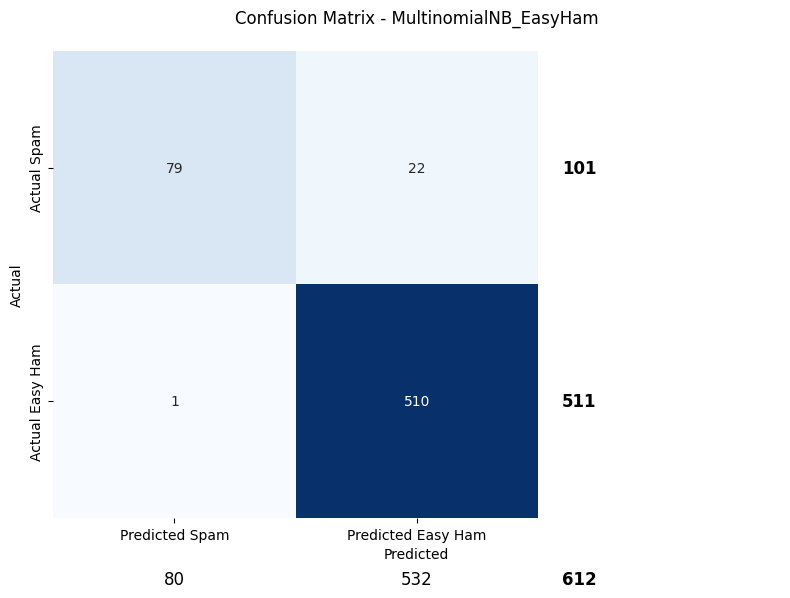

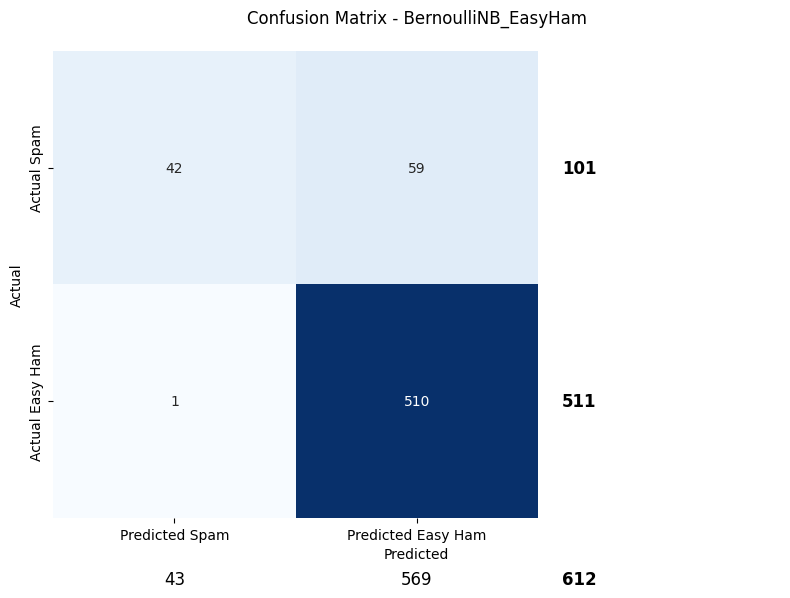

In [27]:
def plot_confusion_matrix_with_margins(cm, classifier_name):

    # Calculate marginal sums
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    total = cm.sum()

    # Get screen dimensions
    # monitor = screeninfo.get_monitors()[0]
    # screen_width = monitor.width / 100  # Convert to inches (roughly)
    # screen_height = monitor.height / 100  # Convert to inches (roughly)

    # Create a new figure with extra space for margins
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Predicted Spam', 'Predicted Easy Ham'],
                yticklabels=['Actual Spam', 'Actual Easy Ham'])

    # Set labels and title
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix - {classifier_name}', pad=20)

    # Adjust the plot to make space for marginal sums
    plt.subplots_adjust(left=0.2, bottom=0.2)

    # Get the axes limits, basically how big is the x and y axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Add row sums to the right of each row
    for i, row_sum in enumerate(row_sums):
        #  axis coords ((0, 0) is lower-left and (1, 1) is upper-right)
        ax.text(xlim[1] + 0.1, i + 0.5, f'{row_sum}', va='center', ha='left', fontsize=12, fontweight='bold')

    # Add column sums below each column
    for i, col_sum in enumerate(col_sums):
        ax.text(i + 0.5, ylim[0] + 0.3, f'{col_sum}', va='bottom', ha='center', fontsize=12)

    # Add total sum at the bottom-right corner
    ax.text(xlim[1] + 0.1, ylim[0] + 0.3, f'{total}', va='bottom', ha='left', fontsize=12, fontweight='bold')

    # Adjust axes limits to accommodate marginal sums
    ax.set_xlim(xlim[0], xlim[1] + 1)
    ax.set_ylim(ylim[0], ylim[1])

    # Remove any residual whitespace
    plt.tight_layout()

    # Save the confusion matrix as a PDF
    plt.savefig(f'confusion_matrix_{classifier_name}.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

# Plot and save confusion matrices without legends and with marginal sums
plot_confusion_matrix_with_margins(conf_matrix_multinomial, 'MultinomialNB_EasyHam')
plot_confusion_matrix_with_margins(conf_matrix_bernoulli, 'BernoulliNB_EasyHam')

# Problem 4

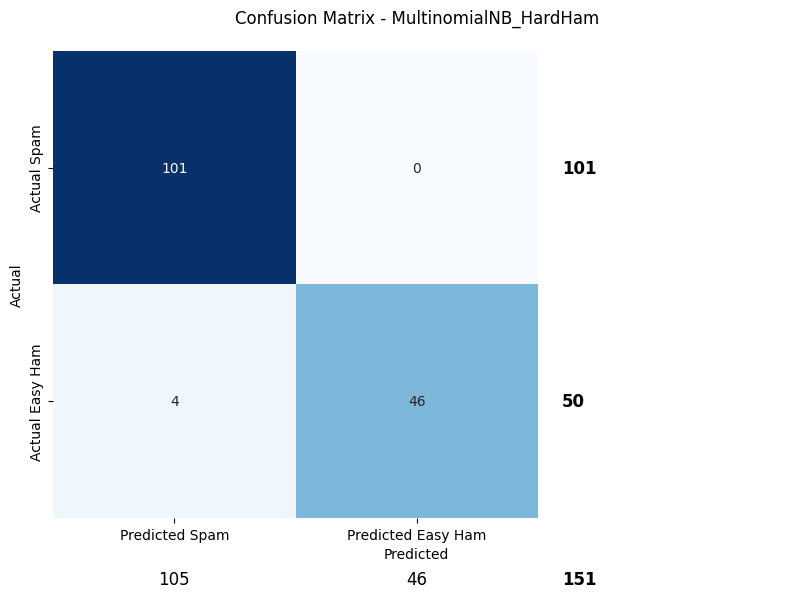

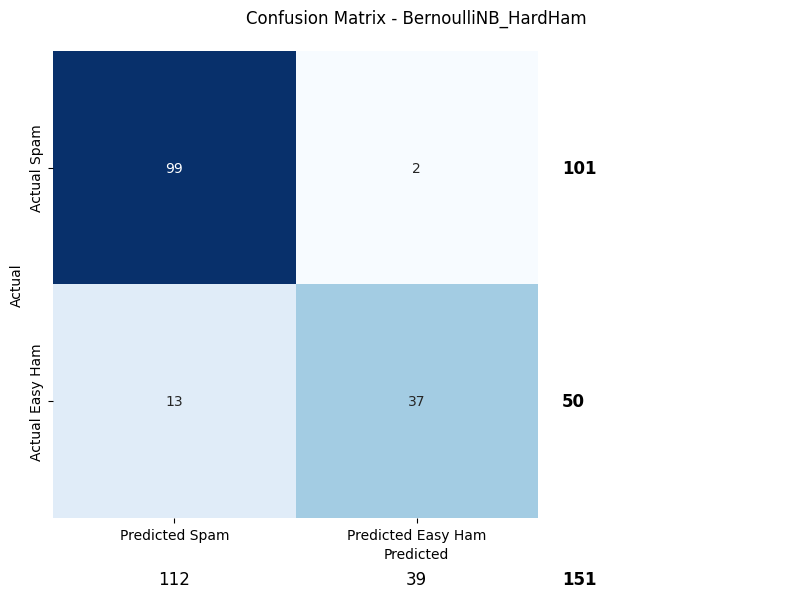

Multinomial Naive Bayes (Hard Ham):
Accuracy: 0.9735
Precision: 0.9619
Recall: 1.0000

Bernoulli Naive Bayes (Hard Ham):
Accuracy: 0.9007
Precision: 0.8839
Recall: 0.9802


In [28]:
# Initialize the classifiers
multinomial_nb_hh = MultinomialNB()
bernoulli_nb_hh = BernoulliNB()

# Train Multinomial Naive Bayes on Hard Ham vs Spam
multinomial_nb_hh.fit(X_train_hh_spam_counts, y_train_hh_spam)

# Train Bernoulli Naive Bayes on Hard Ham vs Spam
bernoulli_nb_hh.fit(X_train_hh_spam_counts, y_train_hh_spam)

# Predict on the test set using Multinomial Naive Bayes
y_pred_multinomial_hh = multinomial_nb_hh.predict(X_test_hh_spam_counts)

# Predict on the test set using Bernoulli Naive Bayes
y_pred_bernoulli_hh = bernoulli_nb_hh.predict(X_test_hh_spam_counts)

# Calculate metrics for Multinomial Naive Bayes
accuracy_multinomial_hh = accuracy_score(y_test_hh_spam, y_pred_multinomial_hh)
precision_multinomial_hh = precision_score(y_test_hh_spam, y_pred_multinomial_hh, pos_label='spam')
recall_multinomial_hh = recall_score(y_test_hh_spam, y_pred_multinomial_hh, pos_label='spam')

# Calculate metrics for Bernoulli Naive Bayes
accuracy_bernoulli_hh = accuracy_score(y_test_hh_spam, y_pred_bernoulli_hh)
precision_bernoulli_hh = precision_score(y_test_hh_spam, y_pred_bernoulli_hh, pos_label='spam')
recall_bernoulli_hh = recall_score(y_test_hh_spam, y_pred_bernoulli_hh, pos_label='spam')

# Generate confusion matrices
conf_matrix_multinomial_hh = confusion_matrix(y_test_hh_spam, y_pred_multinomial_hh, labels=['spam', 'hard_ham'])
conf_matrix_bernoulli_hh = confusion_matrix(y_test_hh_spam, y_pred_bernoulli_hh, labels=['spam', 'hard_ham'])

# Plot and save confusion matrices without legends and with marginal sums
plot_confusion_matrix_with_margins(conf_matrix_multinomial_hh, 'MultinomialNB_HardHam')
plot_confusion_matrix_with_margins(conf_matrix_bernoulli_hh, 'BernoulliNB_HardHam')

# Print the evaluation metrics
print("Multinomial Naive Bayes (Hard Ham):")
print(f"Accuracy: {accuracy_multinomial_hh:.4f}")
print(f"Precision: {precision_multinomial_hh:.4f}")
print(f"Recall: {recall_multinomial_hh:.4f}\n")

print("Bernoulli Naive Bayes (Hard Ham):")
print(f"Accuracy: {accuracy_bernoulli_hh:.4f}")
print(f"Precision: {precision_bernoulli_hh:.4f}")
print(f"Recall: {recall_bernoulli_hh:.4f}")

The classification performance of the Multinomial Naive Bayes (MNB) and Bernoulli Naive Bayes (BNB) classifiers reveals distinct strengths in distinguishing between spam and the two types of ham emails. For Easy Ham vs. Spam, MNB achieved a high accuracy of 96.24% and an impressive precision of 98.75%, indicating that most emails it flagged as spam were indeed spam. However, its recall was moderate at 78.22%, suggesting that some spam emails were missed. In contrast, BNB maintained a similar high precision of 97.67% but suffered from a significantly lower recall of 41.58%, making it less effective in identifying all spam instances.

When evaluating Hard Ham vs. Spam, MNB demonstrated exceptional performance with an accuracy of 97.35%, precision of 96.19%, and perfect recall of 100%, successfully identifying all spam emails without any false negatives. BNB also performed well in this scenario, achieving a high recall of 98.02% and a respectable precision of 88.39%, though slightly lower than MNB.

These results indicate that MNB is generally more reliable across both ham types, offering a better balance between precision and recall. BNB, while maintaining high precision, may miss more spam emails in easier scenarios but improves significantly with harder-to-distinguish ham emails. Overall, Multinomial Naive Bayes proves to be the more robust classifier for spam detection in both Easy Ham and Hard Ham contexts, making it the preferred choice for comprehensive email classification.